<a href="https://colab.research.google.com/github/mmachua/machine-learning-fashion-dataset-training/blob/main/fashionmnisttraintest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#fashion mnist data, 

##import

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape
X_train_full.dtype

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0


In [9]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ['T-shirt/top','trouser','pullover', 'dress','coat', 'sandals', 'shirt','sneakers', 'Bag',
               'Ankle boot']

In [12]:
class_names[y_train[0]]


'coat'

#model

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers


In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 5s 2ms/step - loss: 1.0078 - accuracy: 0.6733 - val_loss: 0.5840 - val_accuracy: 0.7880
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5123 - accuracy: 0.8236 - val_loss: 0.5075 - val_accuracy: 0.8088
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4539 - accuracy: 0.8433 - val_loss: 0.4069 - val_accuracy: 0.8636
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4181 - accuracy: 0.8533 - val_loss: 0.4066 - val_accuracy: 0.8612
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4004 - accuracy: 0.8619 - val_loss: 0.3974 - val_accuracy: 0.8612
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3782 - accuracy: 0.8668 - val_loss: 0.4104 - val_accuracy: 0.8524
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3698 - accuracy: 0.8707 - val_loss: 0.3584 - val_ac

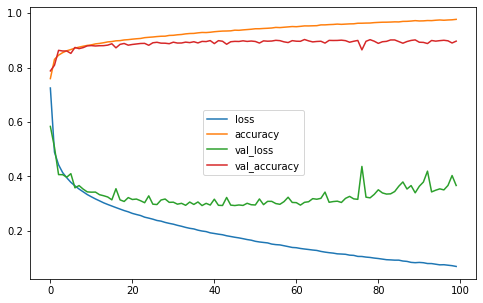

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

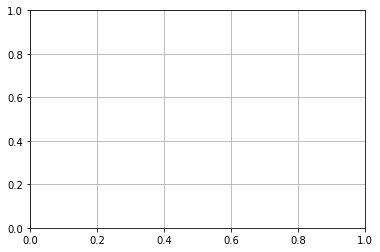

In [21]:
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()